# Mini-projeto - MNIST

Alunos: 
Pedro Beltran,
Luana Silva.


## Classificação de dígitos manuscritos do MNIST

Para este mini-projeto da disciplina eletiva de Redes Neurais (código IF702) serão feitos experimentos com a rede neural desenvolvida por Michael Nielsen e disponível no GitHub através do link https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py .

Para este projeto foram consultadas as instruções do livro disponível em http://neuralnetworksanddeeplearning.com/ também escrito por Michael Nielsen.

Uma última ressalva é que este programa foi modificado para ser compatível com Python em sua versão 3, pois como veremos na linha abaixo, a versão na qual o programa será executado será a distribuição Python da Intel(R) para maior ganho de performance. Para isto foram feitos pequenos ajustes na sintaxe e na biblioteca cPickle, que agora é a _pickle no código onde ocorre a exportação das imagens do arquivo compactado mnist.pkl.gz. Além dessas modificações para Python3 ainda houve uma modificação a respeito do rastreamento da acurácia por classe, que foi requisitado pelo professor da disciplina, Germano C. Vasconcelos.


## Introdução

Esta versão é um resumo geral de cinco longos dias de treinamento, por isso a ordem do índice (In) pode não ser consistente, pois foram realizados muitos e muitos testes (às vezes foi preciso reiniciar o kernel) para que fosse possível entregar bons resultados e plotar muitos gráficos usando o Jupyter. A versão completa com todos os testes realizados (e até um pouco de redundância de informação) encontra-se no GitHub de Pedro Beltran (@pedrovbeltran) em um repositório próprio.

Para o desenvolvimento dessa versão final foram feitos vários programas em python para modularização do projeto. Eles foram importados para a linha de comando no decorrer do treinamento. O código está disponível por completo no repositório do GitHub de Pedro, além dos arquivos nos quais os dados de cada treinamento estão salvos.

No quarto dia de treinamento percebemos que não estávamos reiniciando a rede a cada treinamento e acreditamos que a rede estava aprendendo peculiaridades dos dados de treinamento, pois estava gastando menos épocas para chegar a uma acurácia alta. Em resumo, nos quatro primeiros dias, achamos dois candidatos a ponto ótimo, que foram 𝜂 = 3.5 e  𝜂 = 6.0, testamos para valores acima e abaixo dos respectivos pontos, mas estávamos obtendo resultados estranhos na acurácia. Trazemos então uma parte do treinamento do primeiro dia, e boa parte do quinto dia, que foi quando tivemos um verdadeiro progresso. Agora vamos ao projeto.

In [1]:
import sys
print(sys.version)

3.6.8 |Intel Corporation| (default, Mar  1 2019, 00:10:45) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

Na linha acima exportamos os dados de treinamento, validação e teste. Por hora só usaremos os dados de treinamento e teste. Agora roderemos o código propriamente dito. Por motivos de praticidade, Pedro automatizou o processo de parada do treinamento com o seguinte algoritmo:


**Se não houver melhora alguma na acurácia geral em 5 épocas: PARE**

**Caso contrário: CONTINUE O TREINAMENTO**


O livro do Nielsen chama essa técnica de *early stopping* e é citada no capítulo 3.

*P.S.: Talvez estejamos sendo um pouco pessimistas com relação à quantidade de épocas, mas tendo em vista que isto é apenas um teste, para deixar o processo mais rápido deixaremos em 5.*

In [3]:
import network
from timeit import default_timer as timer
net = network.Network([784,30,10])
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s") 

Training complete after 25 epochs.
Best total accuracy: 9490

Elapsed time: 3min 37.38s


Vemos então que depois de algumas épocas de treinamento temos as acurácias totais no decorrer do tempo. Usamos a biblioteca matplotlib para plotar os gráficos de evolução tanto da acurácia geral quanto da acurácia por classe.

Mas antes, as acurácias eram salvas em um arquivo .json para o caso de dar algum problema e os dados serem perdidos.

In [4]:
test_accuracy = list(test_accuracy) 
acc_by_class = [list(a) for a in acc_by_class]

import save_and_load_data as sd
sd.save_data("saved_accuracies_official_test1.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 5, 10, 3.0)

Neste dia de treinamento, notamos uma pequena falha nos testes devido à não inicialização da rede do zero entre um teste e outro. Testamos essa hipótese e vimos que estava correta. Os últimos valores bons que achamos foram $\eta = 4.0$ e $\eta = 6.0$. Então tentamos valores próximos de 6.0 que apesar de terem passado a acurácia de $\eta = 6.0$, exigiu mais épocas de treinamento para se obter o resultado. Então salvamos os resultados e comparamos usando os gráficos.

Como não obtivemos bons resultados nos demais testes realizados, continuamos com o nosso ponto de referência onde estava e agora faremos apenas um teste final apenas por "desencargo de consciência". Dessa vez será $\eta = 3.5$.

In [8]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) 
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 5, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Training complete after 20 epochs.
Best total accuracy: 9524

Elapsed time: 3min 23.79s


Verificamos que talvez devêssemos mudar a referência. Mas antes salvamos esses resultados e plotamos os gráficos para efeito de comparação entre $\eta = 6.0$ e $\eta = 3.5$.

Após realizar o teste com $\eta = 3.5$ verificamos que os resultados eram bastante parecidos, portanto foi necessário uma comparação com $\eta = 4.0$.

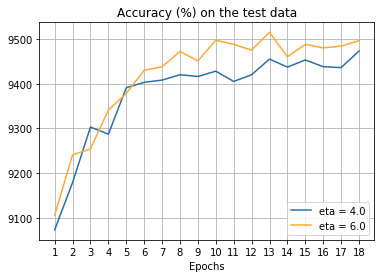

In [11]:
from matplotlib_for_total_acc_2 import plot
import json
from save_and_load_data import load_data

accuracy = []
data_test1 = load_data("saved_accuracies_official_test4.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test2.json") # and here the one you want to test it

# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 4.0','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 4.0','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Após mais alguns testes, ficamos então entre $\eta = 3.5$ e $\eta = 6.0$. Para decidir qual o melhor, variamos o valor do critério de parada: aumentamos para 10 o número de épocas com as quais, se não houvesse nenhuma melhora na acurácia, a rede pararia de ser treinada. 

In [14]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) 
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 6.0, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Training complete after 31 epochs.
Best total accuracy: 9496

Elapsed time: 4min 22.83s


In [15]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import save_and_load_data as sd
sd.save_data("saved_accuracies_official_test7.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 10, 10, 6.0)

In [16]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
net = network.Network([784,30,10]) # A rede supostamente será reiniciada nessa linha de código
start = timer()
test_accuracy, acc_by_class = net.SGD(training_data, 10, 10, 3.5, test_data=test_data)
end = timer()
print("\nElapsed time: " + \
    str(int((end - start) // 60)) + "min " + str(round((end - start) % 60, 2)) + "s")

Training complete after 46 epochs.
Best total accuracy: 9520

Elapsed time: 6min 24.23s


In [17]:
test_accuracy = list(test_accuracy)
acc_by_class = [list(a) for a in acc_by_class]

import save_and_load_data as sd
sd.save_data("saved_accuracies_official_test8.json", test_accuracy, acc_by_class,\
                len(test_accuracy), 10, 10, 3.5)

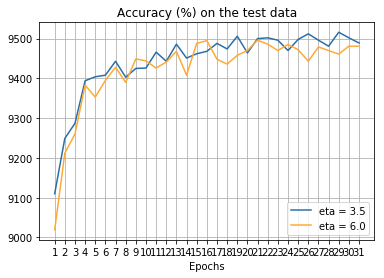

In [18]:
from matplotlib_for_total_acc_2 import plot
import json
from save_and_load_data import load_data

accuracy = []
data_test1 = load_data("saved_accuracies_official_test7.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test8.json") # and here the one you want to test it

# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 6.0','#FFA933'), \
          ('eta = 3.5','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.5','#2A6EA6'), \
          ('eta = 6.0','#FFA933')])

Verificamos, finalmente, por experimentação (e depois de muuuito trabalho) que $\eta = 3.5$ é nosso valor de $\eta$ final. Agora exibimos a acurácia por classe do nosso ponto de referência e a comparação final com $\eta$ inicial.

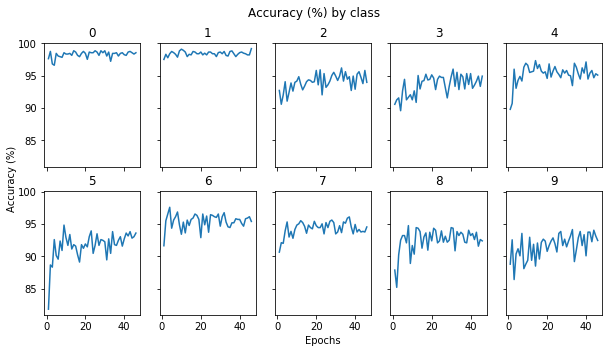

In [19]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot

plot(10, len(test_accuracy), acc_by_class)

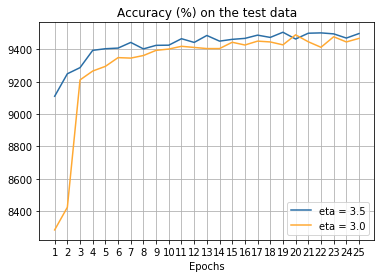

In [21]:
from matplotlib_for_total_acc_2 import plot
import json
from save_and_load_data import load_data

accuracy = []
data_test1 = load_data("saved_accuracies_official_test1.json") # here it goes the reference value of eta
data_test2 = load_data("saved_accuracies_official_test8.json") # and here the one you want to test it

# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1["test_accuracy"]) > len(data_test2["test_accuracy"])):
    accuracy = [data_test1["test_accuracy"][:len(data_test2["test_accuracy"])]]
    accuracy.append(data_test2["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.0','#FFA933'), \
          ('eta = 3.5','#2A6EA6')])
else:
    accuracy = [data_test2["test_accuracy"][:len(data_test1["test_accuracy"])]]
    accuracy.append(data_test1["test_accuracy"])
    plot(len(accuracy), len(accuracy[0]), accuracy, \
         [('eta = 3.5','#2A6EA6'), \
          ('eta = 3.0','#FFA933')])

E aqui acabou o nosso trabalho de achar o $\eta$ perfeito.

## Conclusão:

Baseado nos resultados apresentados, nós acharíamos mais fácil seguir a evolução dos valores do custo por época, já que podemos ver claramente quando $\eta$ está muito alto, muito baixo ou está bom. Para ilustrar melhor há a imagem abaixo

In [26]:
%%HTML
<img src="choosing_learning_rate.png">
<!-- Fonte: https://qph.fs.quoracdn.net/main-qimg-9076a348570818a3843df345eaa9e053 -->

Ou então melhor ainda, usar um algoritmo adaptativo que, além de modificar a taxa de aprendizado de acordo com a necessidade ainda é capaz de fazê-lo para todos os parâmetros.

Enfim, há muitas maneiras diferentes de se abordar o problema da busca por parâmetros otimizados, mas todos eles trabalham com extensiva e exaustiva experimentação.